# Gaussian Naive Bayes for Classification

## Background knowledge
Gaussian Naive Bayes method is a algorithm belonging to Naive Bayes
methods. Naive Bayes methods are based on Bayes' theorem while assuming
that each feature in the domain set is independent to each other. Given
input feature $x_1$ to $x_n$ and class variable $y$, the Bayes Theorem
can be expressed as:  

$$P(y|x_1,...,x_n)=\frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)}$$

As we assumed that each feature is independent to each other, we have:

$$P(x_1,...,x_n|y)=\displaystyle\prod_{i=1}^n P(x_i|y)$$

Therefore, we can get:

$$P(y|x_1,...,x_n)=\frac{P(y)\displaystyle\prod_{i=1}^n P(x_i|y)}{P(x_1,...,x_n)}$$

Since the input is given, $P(x_1,...,x_n)$ is a constant, we can
estimate the probility using only the numerator:

$$P(y|x_1,...,x_n)\propto P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$
$$\hat{y}=\underset{y}{argmax}P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$

In Gaussian Naive Bayes, we assume Gaussian distribution for the
likelihoods of the features:

$$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma^2_y}}e^{-\frac{(x_i-\mu_y)^2}{2\sigma^2_y}}$$

Therefore, we can estimate the Gaussian distribution likelihood from the
mean and variance of the input features.

## Model Implement
First, we would divide our dataset by diifferent class labels, for each feature within each class, we would calculate the mean and variance.

For a given feature $x_i$ within a class $y$ :

$\mu_{y, i}=\frac{1}{N_y} \sum_{j=1}^{N_y} x_{j, i}$

$\sigma_{y, i}^2=\frac{1}{N_y-1} \sum_{j=1}^{N_y}\left(x_{j, i}-\mu_{y, i}\right)^2$

Here $N_y$ is the number of instances in class $y$, and $x_{j, i}$ is the $i$-th feature of the $j$-th instance in class $y$.

With those means and variances computed, we can use them to compute the Gaussian probability for each feature value given the class, and thus apply the Gaussian Naive Bayes classification

Here is the Gaussian probability density function
$$
P(x_i \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,i}^2}} \exp \left( -\frac{(x_i - \mu_{y,i})^2}{2 \sigma_{y,i}^2} \right)
$$

With the Gaussian probability formula, we can compute $P(x_i \mid y)$ for each feature $x_i$ and class $y$:

For feature $x_1$ within class $y$:
   $$
   P(x_1 \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,1}^2}} \exp \left( -\frac{(x_1 - \mu_{y,1})^2}{2 \sigma_{y,1}^2} \right)
   $$

For feature $x_2$ within the same class $y$:
   $$
   P(x_2 \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,2}^2}} \exp \left( -\frac{(x_2 - \mu_{y,2})^2}{2 \sigma_{y,2}^2} \right)
   $$

   We would repeat this calculation for all features within each class.

   Continue those steps in Background knowledge,

   When we have $$P(y|x_1,...,x_n)\propto P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$


   $$\hat{y} = \underset{y}{\arg \max} \; P(y) \prod_{i=1}^n P(x_i | y)$$

   If we take logarithm on both sides, then we will have $$\log \left( P(y | x_1, \dots, x_n) \right) = \log \left( P(y) \prod_{i=1}^n P(x_i | y) \right)$$

   Thus by the sum property of logarithm, we will have
   $$\log \left( P(y | x_1, \dots, x_n) \right) = \log(P(y)) + \sum_{i=1}^n \log(P(x_i | y))$$

   Finally we will get $$\hat{y} = \underset{y}{\arg \max} \; \left( \log(P(y)) + \sum_{i=1}^n \log(P(x_i | y)) \right)$$ where $\hat{y} $  represents the predicted class




   




In [ ]:
import numpy as np
import pickle #for saving the model

class GNB():
  '''
  Gaussian Naive Bayes model.
  The conditional likelihood of each feature is assumed to follow
  Gaussian distribution.

  @attrs:
    n_classes: int, the number of classes
    attrs_mu: a 2D (n_classes x n_attributes) NumPy array of the means
         of the Gaussian distribution for each feature
    attrs_sig: a 2D (n_classes x n_attributes) NumPy array of the
          variances of the Gaussian distribution for each feature
    priors: a 1D NumPy array of the priors distribution
  '''

  def __init__(self):
    """
    Initializes a Gaussian Naive Bayes model with n_classes.
    """
    self.n_classes = None
    self.attrs_mu = None
    self.attrs_sig = None
    self.prior = None

  def train(self, X_train, y_train):
    """
    Trains the model, using maximum likelihood estimation.

    @params:
      X_train: a 2D (n_examples x n_attributes) numpy array
      y_train: a 1D (n_examples) numpy array
    @return:
      a tuple consisting of:
        1) a 2D numpy array of means of the conditional likelihoods
        2) a 2D numpy array of variance of the conditional likelihoods
        3) a 1D numpy array of the priors distribution
    """
    n_features = X_train.shape[1]
    self.n_classes = len(set(y_train))
    self.attrs_mu = np.zeros((self.n_classes, n_features))
    self.attrs_sig = np.zeros((self.n_classes, n_features))
    self.priors = np.zeros(self.n_classes)

    for c in range(self.n_classes):
        X_c = X_train[y_train == c]
        self.attrs_mu[c, :] = X_c.mean(axis=0)
        self.attrs_sig[c, :] = X_c.var(axis=0)
        self.priors[c] = X_c.shape[0] / X_train.shape[0]

    return self.attrs_mu, self.attrs_sig, self.priors



  def predict_log_prob(self, inputs):
    """
    Outputs a joint log probability for each input in inputs.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 2D numpy array of predicted probabilities for each class
    """
    log_probs = []
    for c in range(self.n_classes):
      log_prior = np.log(self.priors[c])
      log_likelihood = np.sum(
          np.log(self._gaussian_prob(inputs, self.attrs_mu[c], self.attrs_sig[c])), axis=1
      )
      log_probs.append(log_prior + log_likelihood)
    log_probs = np.array(log_probs).T
    return log_probs
  

  def predict_prob(self, inputs):
    """
    Outputs a predicted probability for each input in inputs.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 2D numpy array of predicted probabilities for each class
    """
    probs = np.exp(self.predict_log_prob(inputs))
    return probs


  def predict(self, inputs):
    """
    Outputs a predicted label for each input in inputs.
    We compute log sum rather than multiply the probabilities.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 1D numpy array of predictions
    """
    log_probs = self.predict_prob(inputs)
    return np.argmax(log_probs, axis=1)



  def accuracy(self, X_test, y_test):
    """
    Outputs the accuracy of the trained model on a given dataset (data).

    @params:
      X_test: a 2D numpy array of examples
      y_test: a 1D numpy array of labels
    @return:
      a float number indicating accuracy (between 0 and 1)
    """

    y_pred = self.predict(X_test)
    return np.mean(y_pred == y_test)


  def _gaussian_prob(self, x, mu, sig, epsilon=1e-8):
    """
    Calcualte the gaussian probability for given input x and Gaussian
    distribution parameters

    @params:
      x:  a float number to calculate the probability
      mu: the mean of the Gaussian distribution
      sig: the variance of the Gaussian distribution
    @return:
      a float number between 0-1 indicating the likelihood
    """
    adjusted_sig = sig + epsilon
    exponent = np.exp(-((x - mu) ** 2) / (2 * adjusted_sig))
    return (1 / np.sqrt(2 * np.pi * adjusted_sig)) * exponent

  def save(self, filename):
        """
        Save the trained model to a file using pickle.

        @params:
            filename: a string, the name of the file to save the model
        """
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

  @staticmethod
  def load(filename):
        """
        Load a GaussianNB model from a file using pickle.

        @params:
            filename: a string, the name of the file to load the model from
        @return:
            GaussianNB object
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)

# PCA-GNB classifier
We've already implemented the Gaussian Naive Bayes (GNB) classifier above. However, when visualizing the gaussian distributions, we found that the Gaussian ellipses always has their axis perpendicular to the feature axis. This is because GNB assumes that all the features are independent to each other. But in reality, features are often correlated. Therefore, we can add a PCA to eliminate the correlations between features. The conditional likelihood of each principle component is assumed to follow Gaussian distribution.  

## PCA dimension-reduction
PCA is a dimension-reduction technique that can be used to reduce the dimensionality of a dataset while preserving as much of the variance as possible. It works by finding the principal components of the data, which are the directions in which the data varies the most. The first principal component is the direction in which the data varies the most, the second principal component is the direction in which the data varies the second most, and so on. By projecting the data onto the first few principal components, we can reduce the dimensionality of the data while preserving most of the variance.  

PCA is calculated using eigenvalue decomposition. The covariance matrix of the data is calculated, and then the eigenvectors and eigenvalues of the covariance matrix are found. The eigenvectors are the principal components, and the eigenvalues are the variances of the principal components. The principal components are sorted by their eigenvalues in descending order, and the first few principal components are selected to form the new feature space. Since the principal components are the eigenvalues, they are orthogonal to each other, which supports the assumption of GNB.

## GNB classifier on selected PCs
After the PCA dimension-reduction is applied, we can now train the GNB on the selected first few PCs. The dimension-reduced data is not only independent, but also noise-reduced, which leads to higher GNB classification performance.

In [ ]:
class PCA_GNB():
  '''
  Gaussian Naive Bayes models have the assumption that all the features
  are independent to each other, but it's not always possible. Therefore,
  we can add a PCA to eliminate the correlations between features.
  The conditional likelihood of each feature is assumed to follow
  Gaussian distribution.

  @attrs:
    n_classes: int, the number of classes
    attrs_mu: a 2D (n_classes x n_attributes) NumPy array of the means
         of the Gaussian distribution for each feature
    attrs_sig: a 2D (n_classes x n_attributes) NumPy array of the
          variances of the Gaussian distribution for each feature
    priors: a 1D NumPy array of the priors distribution
  '''

  def __init__(self, n_components=2):
    """
    Initializes a PCA-GNB model with a given number of PCA components.

    @params:
      n_components: The number of PCA components to use to train GNB model
    """
    # GNB params
    self.n_classes = None
    self.attrs_mu = None
    self.attrs_sig = None
    self.prior = None

    # PCA params
    self.n_components = n_components
    self.ftr_means = None
    self.components = None
    self.variance_share = None


  def train(self, X_train, y_train):
    """
    Train the PCA model using matrix eigendecomposition method.
    Then train the GNB model, using maximum likelihood estimation.

    @params:
      X_train: a 2D (n_examples x n_attributes) numpy array
      y_train: a 1D (n_examples) numpy array
    @return:
      a tuple consisting of:
        1) a 2D numpy array of means of the conditional likelihoods
        2) a 2D numpy array of variance of the conditional likelihoods
        3) a 1D numpy array of the priors distribution
    """
    # ------------- Train the PCA model -------------
    # Detrend
    self.ftr_means = np.mean(X_train, axis=0)
    X_center = X_train - self.ftr_means

    # Eigendecomposition
    n_samples = X_train.shape[0]
    self.cov_mat = X_center.T @ X_center / (n_samples-1)
    e_values, e_vectors = np.linalg.eigh(self.cov_mat)

    # Calculate variance share and components and store
    ws = np.sort(e_values)[::-1]
    self.variance_share = ws/(np.sum(ws))
    self.components = e_vectors[:, np.argsort(e_values)[::-1]]

    # ------------- Perform PCA transform on training data -------------
    X_trans = self.transform(X_train, self.n_components)

    # ------------- Train the GNB model on top n PCs -------------
    n_features = self.n_components
    self.n_classes = len(set(y_train))
    self.attrs_mu = np.zeros((self.n_classes, n_features))
    self.attrs_sig = np.zeros((self.n_classes, n_features))
    self.priors = np.zeros(self.n_classes)

    for c in range(self.n_classes):
        X_c = X_trans[y_train == c]
        self.attrs_mu[c, :] = X_c.mean(axis=0)
        self.attrs_sig[c, :] = X_c.var(axis=0)
        self.priors[c] = X_c.shape[0] / n_samples

    return self.attrs_mu, self.attrs_sig, self.priors

  
  def transform(self, X:np.ndarray, n_components:int) -> np.ndarray:
    """Apply dimensionality reduction to X (m x d).
    Return transformed values with dimension n<d.
    
    Parameters
    ----------
        X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
        n_components: Number of principal components, i.e. reduced dimension."""
    
    assert n_components<=X.shape[1], "Number of components cannot be greater than input dimension."
    
    # TODO: center X and transform as per number of components
    X_detrend = X - self.ftr_means
    X_ld = X_detrend @ self.components[:, 0:n_components]
    
    return X_ld


  def predict_log_prob(self, inputs):
    """
    Outputs a joint log probability for each input in inputs.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 2D numpy array of predicted probabilities for each class
    """
    # Perform PCA transform first
    inputs_trans = self.transform(inputs, self.n_components)
    log_probs = []
    for c in range(self.n_classes):
      log_prior = np.log(self.priors[c])
      log_likelihood = np.sum(
          np.log(self._gaussian_prob(inputs_trans, self.attrs_mu[c], self.attrs_sig[c])), axis=1
      )
      log_probs.append(log_prior + log_likelihood)
    log_probs = np.array(log_probs).T
    return log_probs
  

  def predict_prob(self, inputs):
    """
    Outputs a predicted probability for each input in inputs.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 2D numpy array of predicted probabilities for each class
    """
    probs = np.exp(self.predict_log_prob(inputs))
    return probs


  def predict(self, inputs):
    """
    Outputs a predicted label for each input in inputs.
    We compute log sum rather than multiply the probabilities.

    @params:
      inputs: a 2D NumPy array containing inputs
    @return:
      a 1D numpy array of predictions
    """
    log_probs = self.predict_prob(inputs)
    return np.argmax(log_probs, axis=1)



  def accuracy(self, X_test, y_test):
    """
    Outputs the accuracy of the trained model on a given dataset (data).

    @params:
      X_test: a 2D numpy array of examples
      y_test: a 1D numpy array of labels
    @return:
      a float number indicating accuracy (between 0 and 1)
    """

    y_pred = self.predict(X_test)
    return np.mean(y_pred == y_test)


  def _gaussian_prob(self, x, mu, sig, epsilon=1e-8):
    """
    Calculate the gaussian probability for given input x and Gaussian
    distribution parameters

    @params:
      x:  a float number to calculate the probability
      mu: the mean of the Gaussian distribution
      sig: the variance of the Gaussian distribution
    @return:
      a float number between 0-1 indicating the likelihood
    """
    adjusted_sig = sig + epsilon
    exponent = np.exp(-((x - mu) ** 2) / (2 * adjusted_sig))
    return (1 / np.sqrt(2 * np.pi * adjusted_sig)) * exponent

  def save(self, filename):
        """
        Save the trained model to a file using pickle.

        @params:
            filename: a string, the name of the file to save the model
        """
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

  @staticmethod
  def load(filename):
        """
        Load a GaussianNB model from a file using pickle.

        @params:
            filename: a string, the name of the file to load the model from
        @return:
            GaussianNB object
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)

TEST SUITE

In [3]:
import numpy as np

# Initialize and train the model
model = GNB()
X_train = np.array([[1.0, 2.0], [1.5, 1.8], [3.0, 3.2], [4.5, 4.8]])
y_train = np.array([0, 0, 1, 1])
model.train(X_train, y_train)

# Try saving the model
model.save("gaussian_nb_model.pkl")

# check if the file was created
!ls -l gaussian_nb_model.pkl

import unittest


class TestGaussianNB(unittest.TestCase):
    def setUp(self):
        # Initialize a GaussianNB instance with 2 classes for training and testing
        self.model = GNB()

        # sample training data: 2 features and binary labels
        self.X_train = np.array([[1.0, 2.0], [1.5, 1.8], [3.0, 3.2], [4.5, 4.8]])
        self.y_train = np.array([0, 0, 1, 1])

        # Sample test data
        self.X_test = np.array([[1.2, 2.1], [3.2, 3.3]])
        self.y_test = np.array([0, 1])

    def test_model_save_and_load(self):
        # train the model
        self.model.train(self.X_train, self.y_train)

        # save the model
        self.model.save("gaussian_nb_model.pkl")

        # Load the model
        loaded_model = GNB.load("gaussian_nb_model.pkl")

        # Check if loaded model has the same priors, means, and variances
        np.testing.assert_almost_equal(self.model.priors, loaded_model.priors, decimal=5, err_msg="Priors do not match after loading.")
        np.testing.assert_almost_equal(self.model.attrs_mu, loaded_model.attrs_mu, decimal=5, err_msg="Means do not match after loading.")
        np.testing.assert_almost_equal(self.model.attrs_sig, loaded_model.attrs_sig, decimal=5, err_msg="Variances do not match after loading.")

        # Check if predictions with the loaded model match the original model
        original_predictions = self.model.predict(self.X_test)
        loaded_predictions = loaded_model.predict(self.X_test)
        np.testing.assert_array_equal(original_predictions, loaded_predictions, err_msg="Predictions do not match after loading the model.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


-rw-rw-r-- 1 lys lys 374 Dec  1 20:03 gaussian_nb_model.pkl


.
----------------------------------------------------------------------
Ran 1 test in 0.031s

OK


# Test Naive Bayes model with Sci-kit learn package

In [33]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()

data_list = [iris, wine, breast_cancer]
data_name = ['Iris', 'Wine', 'Breast Cancer']

print('Test model accuracies...')
print('Using n_components=4 for PCA-GNB model here.')
for i in range(len(data_list)):
    data = data_list[i]
    dn = data_name[i]
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Our model
    my_model = GNB()
    my_model.train(X_train, y_train)
    print('-----------------', dn, '-------------------')
    print('Our model\'s accuray: ', my_model.accuracy(X_test, y_test))

    # Sklearn model
    sklearn_model = GaussianNB()
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    print('Sklearn model\'s accuray: ', accuracy_score(y_test, y_pred_sklearn))

    # PCA-GNB model
    my_model2 = PCA_GNB(n_components=4)
    my_model2.train(X_train, y_train)
    print('PCA-GNB model\'s accuracy: ', my_model2.accuracy(X_test, y_test))
    print()

Test model accuracies...
Using n_components=4 for PCA-GNB model here.
----------------- Iris -------------------
Our model's accuray:  1.0
Sklearn model's accuray:  1.0
PCA-GNB model's accuracy:  1.0

----------------- Wine -------------------
Our model's accuray:  0.9444444444444444
Sklearn model's accuray:  0.9444444444444444
PCA-GNB model's accuracy:  0.9629629629629629

----------------- Breast Cancer -------------------
Our model's accuray:  0.9122807017543859
Sklearn model's accuray:  0.9239766081871345
PCA-GNB model's accuracy:  0.935672514619883



# Test different n_components values, using Sklearn package GNB as baseline

In [31]:
import matplotlib.pyplot as plt

def model_test(dataset, name):
    X, y = dataset.data, dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Iterate and get accuracys for different n_components
    n_features = X_train.shape[1]
    pca_acc = []
    x_pcs = np.arange(1, n_features+1)
    for i in range(n_features):
        pca_gnb = PCA_GNB(n_components=i+1)
        pca_gnb.train(X_train, y_train)
        pca_acc.append(pca_gnb.accuracy(X_test, y_test))
    
    # Also calculate sklearn acc and as baseline
    sklearn_model = GaussianNB()
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    baseline_acc = accuracy_score(y_test, y_pred_sklearn)

    plt.figure(figsize=(6, 4))
    plt.plot(x_pcs, pca_acc, label='PCA-GNB model')
    plt.xlabel('PCs')
    plt.ylabel('Accuracy')
    plt.title(f'Dataset: {name}')
    plt.axhline(baseline_acc, color='r', linestyle='--', label='Sklearn GNB model')
    plt.legend()
    plt.show()

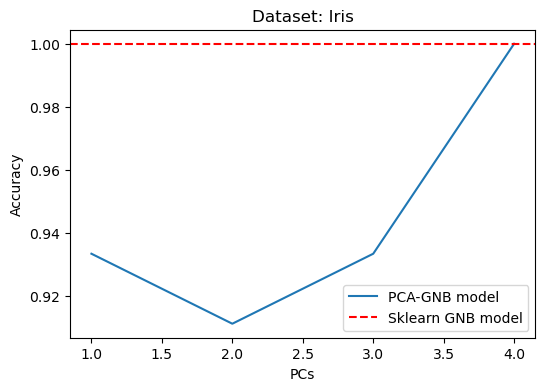

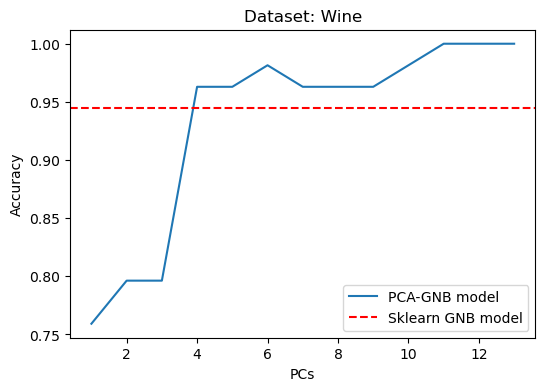

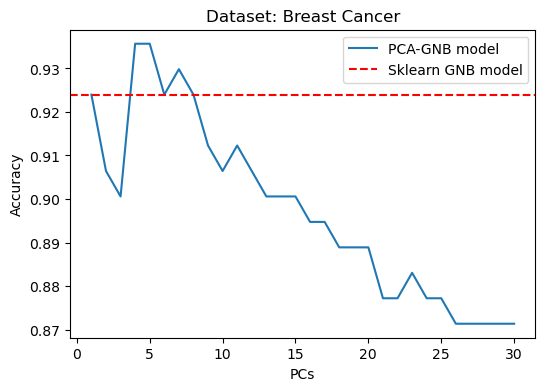

In [32]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()

data_list = [iris, wine, breast_cancer]
data_name = ['Iris', 'Wine', 'Breast Cancer']

for i in range(len(data_list)):
    model_test(data_list[i], data_name[i])

# Visualize the model

In [ ]:
def vis_model_compare(X, y):
    # Init two models and train
    gnb = GNB()
    gnb_sklearn = GaussianNB()
    pca_gnb = PCA_GNB()
    
    gnb.train(X, y)
    gnb_sklearn.fit(X, y)
    pca_gnb.train(X, y)

    # Create mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each meshgrid
    Z = gnb.predict(grid_points)
    Z = Z.reshape(xx.shape)

    Z_sklearn = gnb_sklearn.predict(grid_points)
    Z_sklearn = Z_sklearn.reshape(xx.shape)

    Z_pca = pca_gnb.predict(grid_points)
    Z_pca = Z_pca.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='hsv')
    for i in range(len(np.unique(y))):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("Our GaussianNB model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.subplot(1, 3, 2)
    plt.contourf(xx, yy, Z_sklearn, alpha=0.5, cmap='hsv')
    for i in range(len(np.unique(y))):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("Sklearn model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.subplot(1, 3, 3)
    plt.contourf(xx, yy, Z_pca, alpha=0.5, cmap='hsv')
    for i in range(len(np.unique(y))):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("PCA-GNB model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
def vis_prob_compare(X, y):
    # Init two models and train
    gnb = GNB()
    gnb_sklearn = GaussianNB()
    pca_gnb = PCA_GNB(n_components=2)
    
    gnb.train(X, y)
    gnb_sklearn.fit(X, y)
    pca_gnb.train(X, y)

    # Get n_classes
    n_classes = gnb.n_classes

    # Create mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Calculate the probability for each mesh
    probs = gnb.predict_joint_prob(grid_points)
    probs_sklearn = np.exp(gnb_sklearn.predict_joint_log_proba(grid_points))
    probs_pca = pca_gnb.predict_joint_prob(grid_points)

    # Plot the prob distribution
    plt.figure(figsize=(12, 4*n_classes))
    for c in range(n_classes):
        plt.subplot(n_classes, 3, 3*c+1)
        plt.contourf(xx, yy, probs[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c==0:
            plt.title('Our model')

        plt.subplot(n_classes, 3, 3*c+2)
        plt.contourf(xx, yy, probs_sklearn[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c==0:
            plt.title('Sklearn model')

        plt.subplot(n_classes, 3, 3*c+3)
        plt.contourf(xx, yy, probs_pca[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c==0:
            plt.title('PCA-GNB model')
    plt.tight_layout()
    plt.show()


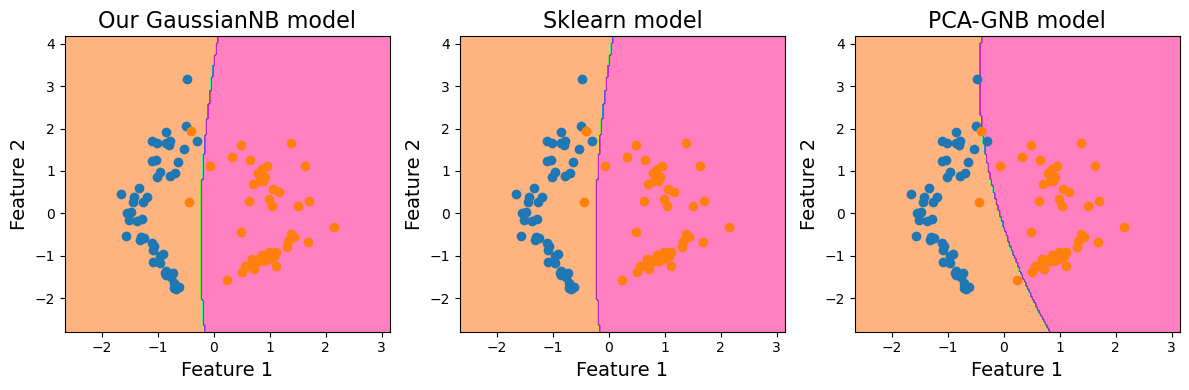

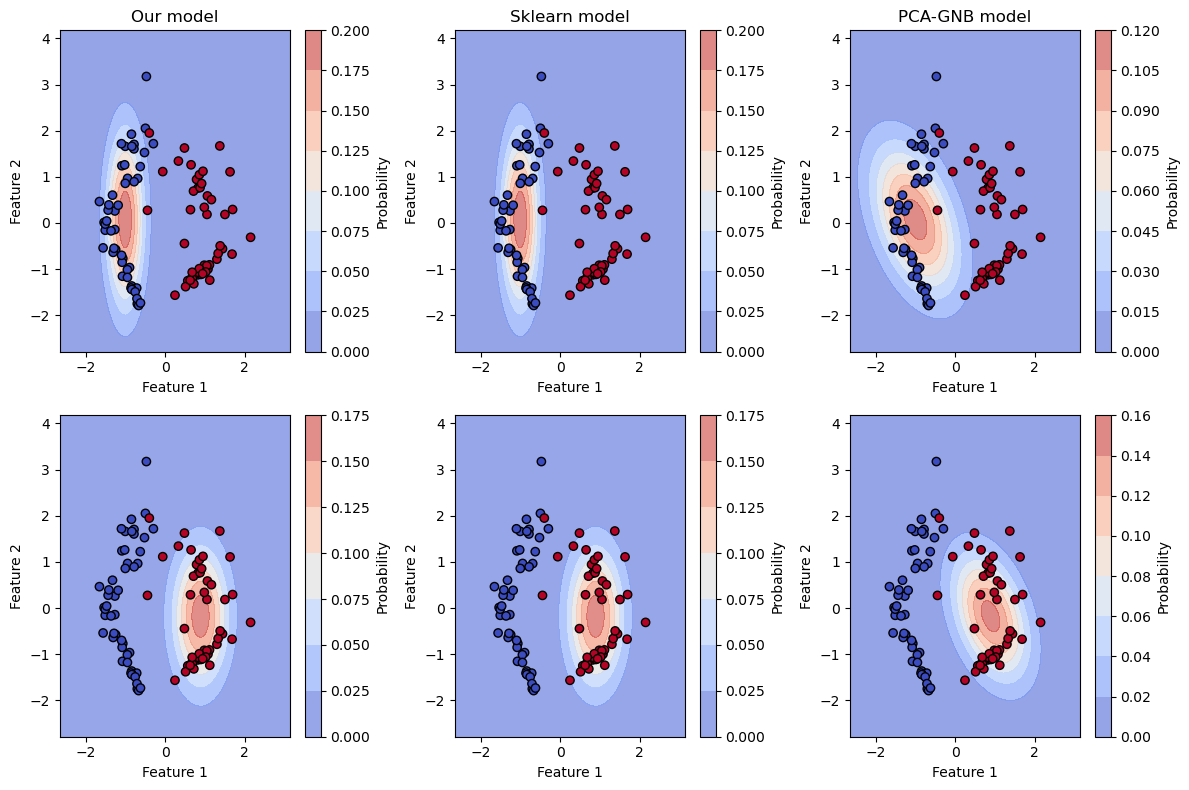

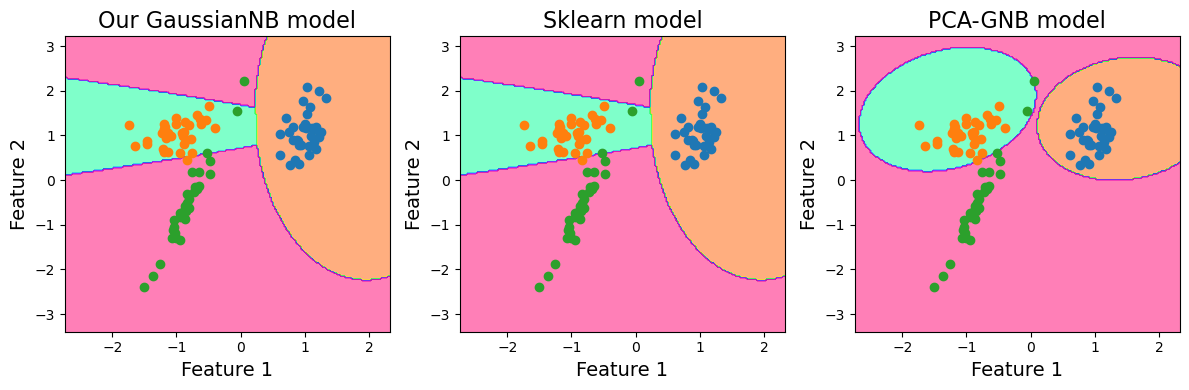

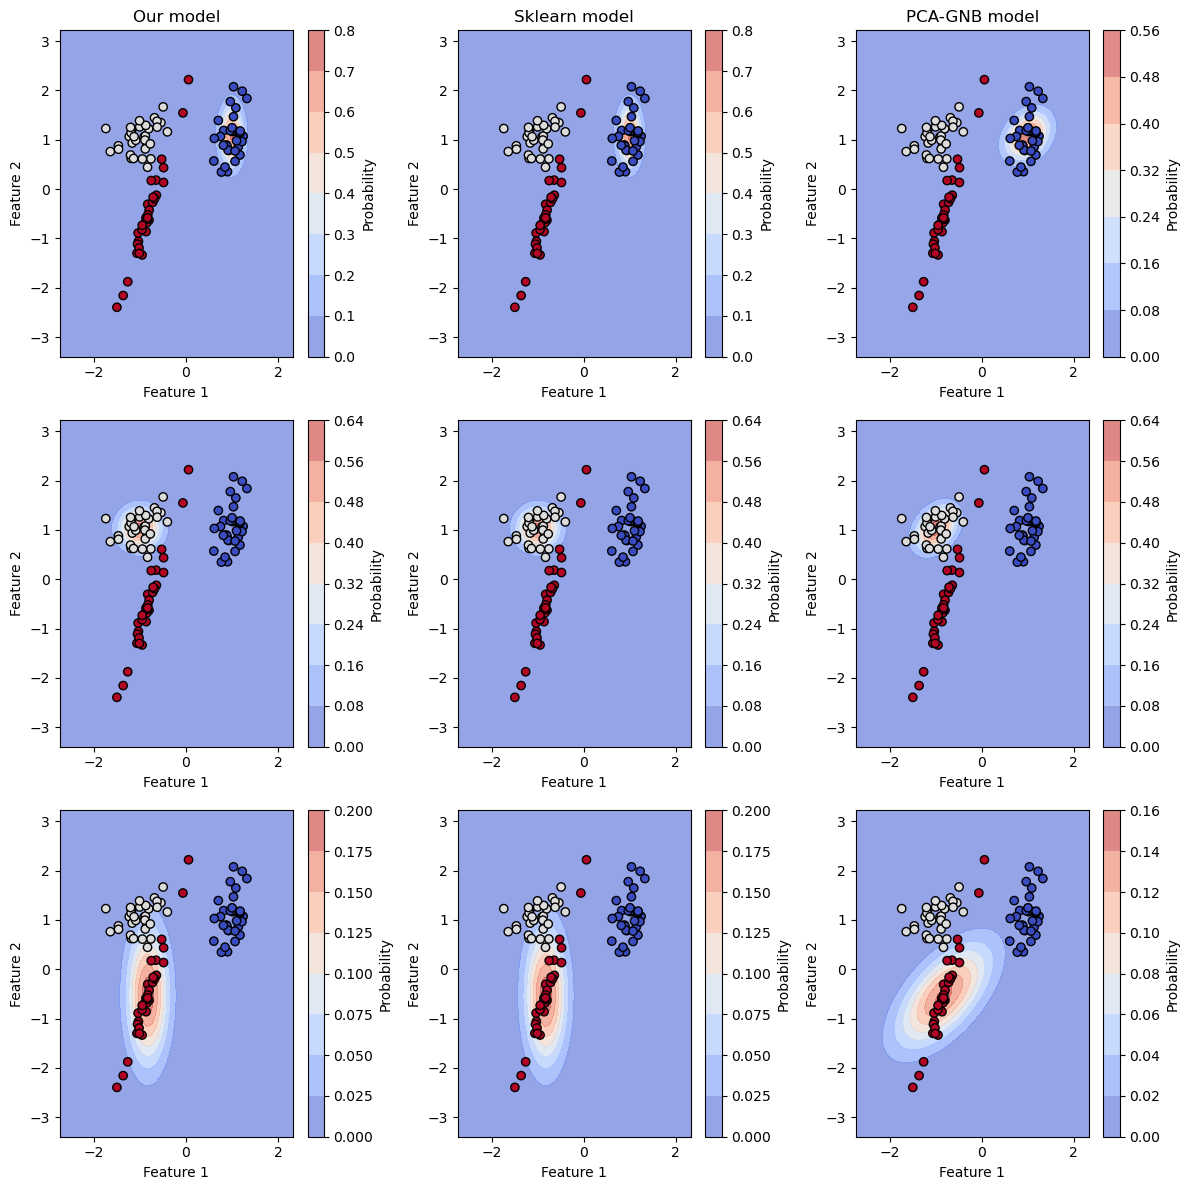

In [10]:
from sklearn.datasets import make_classification

# Two classes
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2
)

vis_model_compare(X, y)
vis_prob_compare(X, y)

# Three classes
X, y = make_classification(
    n_classes=3, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=1
)

vis_model_compare(X, y)
vis_prob_compare(X, y)